In [1]:
import splitfolders
input_folder=r"C:\Users\Hrishi\Desktop\projects\mini projects\crop disease identification\plantvillage dataset\color"

In [2]:
output_folder="data"
splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(0.8,0.2))

In [3]:
import tensorflow as tf
Image_size=(224,224)
Batch_size=32
data_dir=r'C:\Users\Hrishi\Desktop\projects\mini projects\crop disease identification\data'

In [4]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    image_size=Image_size,
    batch_size=Batch_size,
    label_mode='categorical'
)

Found 43429 files belonging to 38 classes.


In [5]:
validation_dataset=tf.keras.utils.image_dataset_from_directory(
    data_dir +'/val',
    image_size=Image_size,
    batch_size=Batch_size,
    label_mode='categorical'
)

Found 10876 files belonging to 38 classes.


In [6]:
class_names=train_dataset.class_names
Num_classes=len(class_names)
print(f"Found {Num_classes} classes: {class_names[:5]}...")

autotune=tf.data.AUTOTUNE
train_dataset=train_dataset.cache().prefetch(buffer_size=autotune)
validation_dataset=validation_dataset.cache().prefetch(buffer_size=autotune)


Found 38 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']...


In [7]:
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [8]:
data_augementation=tf.keras.Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.2),
], name="data_augmentation")

In [9]:
base_model=MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable=False
inputs=Input(shape=(224,224,3),name="input_layer")
x=data_augementation(inputs)
x=preprocess_input(x)
x=base_model(x,training=False)
x=GlobalAveragePooling2D(name="global_avg_pool")(x)
x=Dropout(0.3,name="dropout_1")(x)
outputs=Dense(Num_classes,activation='softmax',name="output_layer")(x)
model=Model(inputs,outputs)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 38)             │        48,678 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 48,678 (190.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
e=10
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=e


    
)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 654s 477ms/step - accuracy: 0.8383 - loss: 0.5680 - val_accuracy: 0.9264 - val_loss: 0.2531
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 670s 493ms/step - accuracy: 0.9106 - loss: 0.2796 - val_accuracy: 0.9324 - val_loss: 0.2136
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 671s 494ms/step - accuracy: 0.9229 - loss: 0.2390 - val_accuracy: 0.9399 - val_loss: 0.1860
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 678s 499ms/step - accuracy: 0.9266 - loss: 0.2229 - val_accuracy: 0.9474 - val_loss: 0.1676
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 671s 494ms/step - accuracy: 0.9284 - loss: 0.2175 - val_accuracy: 0.9468 - val_loss: 0.1703
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 688s 507ms/step - accuracy: 0.9307 - loss: 0.2087 - val_accuracy: 0.9475 - val_loss: 0.1652
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 680s 500ms/step - accuracy: 0.9310 - loss: 0.2092 - val_accuracy: 0.9474 - val_loss: 0.1600
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 677s 498ms/step - ac

In [11]:
model.save('plant_disease_model_phase1.h5')
print("Model saved after Phase 1")

Model saved after Phase 1


In [14]:
base_model.trainable = True
print(f"Number of layers in the base model: {len(base_model.layers)}")

fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_e = 10
total_epochs = e + fine_tune_e

history_fine = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]   
)


Number of layers in the base model: 154
Epoch 10/20


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 988s 716ms/step - accuracy: 0.9236 - loss: 0.2543 - val_accuracy: 0.9148 - val_loss: 0.3177
Epoch 11/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 947s 697ms/step - accuracy: 0.9674 - loss: 0.0997 - val_accuracy: 0.9332 - val_loss: 0.2392
Epoch 12/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 984s 725ms/step - accuracy: 0.9769 - loss: 0.0670 - val_accuracy: 0.9229 - val_loss: 0.2740
Epoch 13/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 987s 727ms/step - accuracy: 0.9813 - loss: 0.0557 - val_accuracy: 0.9777 - val_loss: 0.0736
Epoch 14/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 951s 700ms/step - accuracy: 0.9857 - loss: 0.0442 - val_accuracy: 0.9766 - val_loss: 0.0772
Epoch 15/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 958s 706ms/step - accuracy: 0.9862 - loss: 0.0403 - val_accuracy: 0.9773 - val_loss: 0.0821
Epoch 16/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 951s 701ms/step - accuracy: 0.9892 - loss: 0.0317 - val_accuracy: 0.9787 - val_loss: 0.0748
Epoch 17/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 955s 703ms/step - accura

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # CRITICAL IMPORT
import numpy as np

# --- 1. Load the Model (Required for a new cell) ---
# NOTE: If you are running this in the same notebook where you trained, 
# and the 'model' object is still in memory, you can skip the load part. 
# We include it here for robustness.
CUSTOM_OBJECTS = {'TrueDivide': tf.math.truediv}
try:
    with tf.keras.utils.custom_object_scope(CUSTOM_OBJECTS):
        model = tf.keras.models.load_model('plant_disease_model_final.h5', compile=False)
except Exception as e:
    print(f"Error loading model (may be okay if model is already in memory): {e}")

# Define class names (REQUIRED)
CLASS_NAMES = [
    'Apple_scab', 'Apple_black_rot', 'Apple_cedar_apple_rust', 'Apple_healthy',
    'Blueberry_healthy', 
    'Cherry_(including_sour)_powdery_mildew', 'Cherry_(including_sour)_healthy',
    'Corn_(maize)_Cercospora_leaf_spot_Gray_leaf_spot', 'Corn_(maize)_Common_rust_',
    'Corn_(maize)_Northern_Leaf_Blight', 'Corn_(maize)_healthy',
    'Grape_black_rot', 'Grape_esca_(black_measles)', 'Grape_leaf_blight_(Isariopsis_leaf_spot)', 'Grape_healthy',
    'Orange_Haunglongbing_(Citrus_greening)',
    'Peach_bacterial_spot', 'Peach_healthy',
    'Pepper,_bell_bacterial_spot', 'Pepper,_bell_healthy',
    'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy',
    'Raspberry_healthy',
    'Soybean_healthy',
    'Squash_powdery_mildew',
    'Strawberry_leaf_scorch', 'Strawberry_healthy',
    'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
    'Tomato_leaf_mold', 'Tomato_septoria_leaf_spot',
    'Tomato_spider_mites_two-spotted_spider_mite', 'Tomato_target_spot',
    'Tomato_mosaic_virus', 'Tomato_yellow_leaf_curl_virus', 'Tomato_healthy'
]

img_path=r"C:\Users\Hrishi\Downloads\RS_Rust 1563.JPG"
img=image.load_img(img_path, target_size=(224, 224))
img_array=image.img_to_array(img)
img_batch=np.expand_dims(img_array, axis=0) 

processed_img = preprocess_input(img_batch)

predictions = model.predict(processed_img)

predicted_class_index = np.argmax(predictions[0])
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = 100 * np.max(predictions[0])

print(f"Predicted class: {predicted_class_name} with {confidence: .2f}% confidence.")

Error loading model (may be okay if model is already in memory): Missing required positional argument
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class: Corn_(maize)_Common_rust_ with  95.85% confidence.


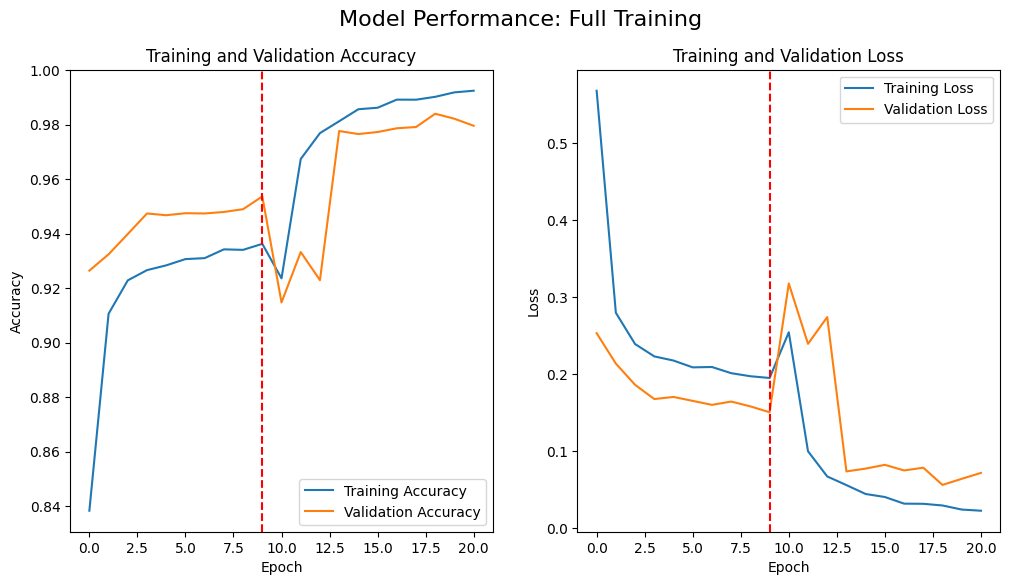

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Add a vertical line to show where fine-tuning started
# history.epoch[-1] is 9 (the 10th epoch, 0-indexed)
plt.axvline(history.epoch[-1], color='red', linestyle='--', label='Start Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 4. Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.axvline(history.epoch[-1], color='red', linestyle='--', label='Start Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.suptitle('Model Performance: Full Training', fontsize=16)
plt.show()

In [17]:
model.save('plant_disease_model_final.h5')
print("Final fine-tuned model saved successfully!")

Final fine-tuned model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

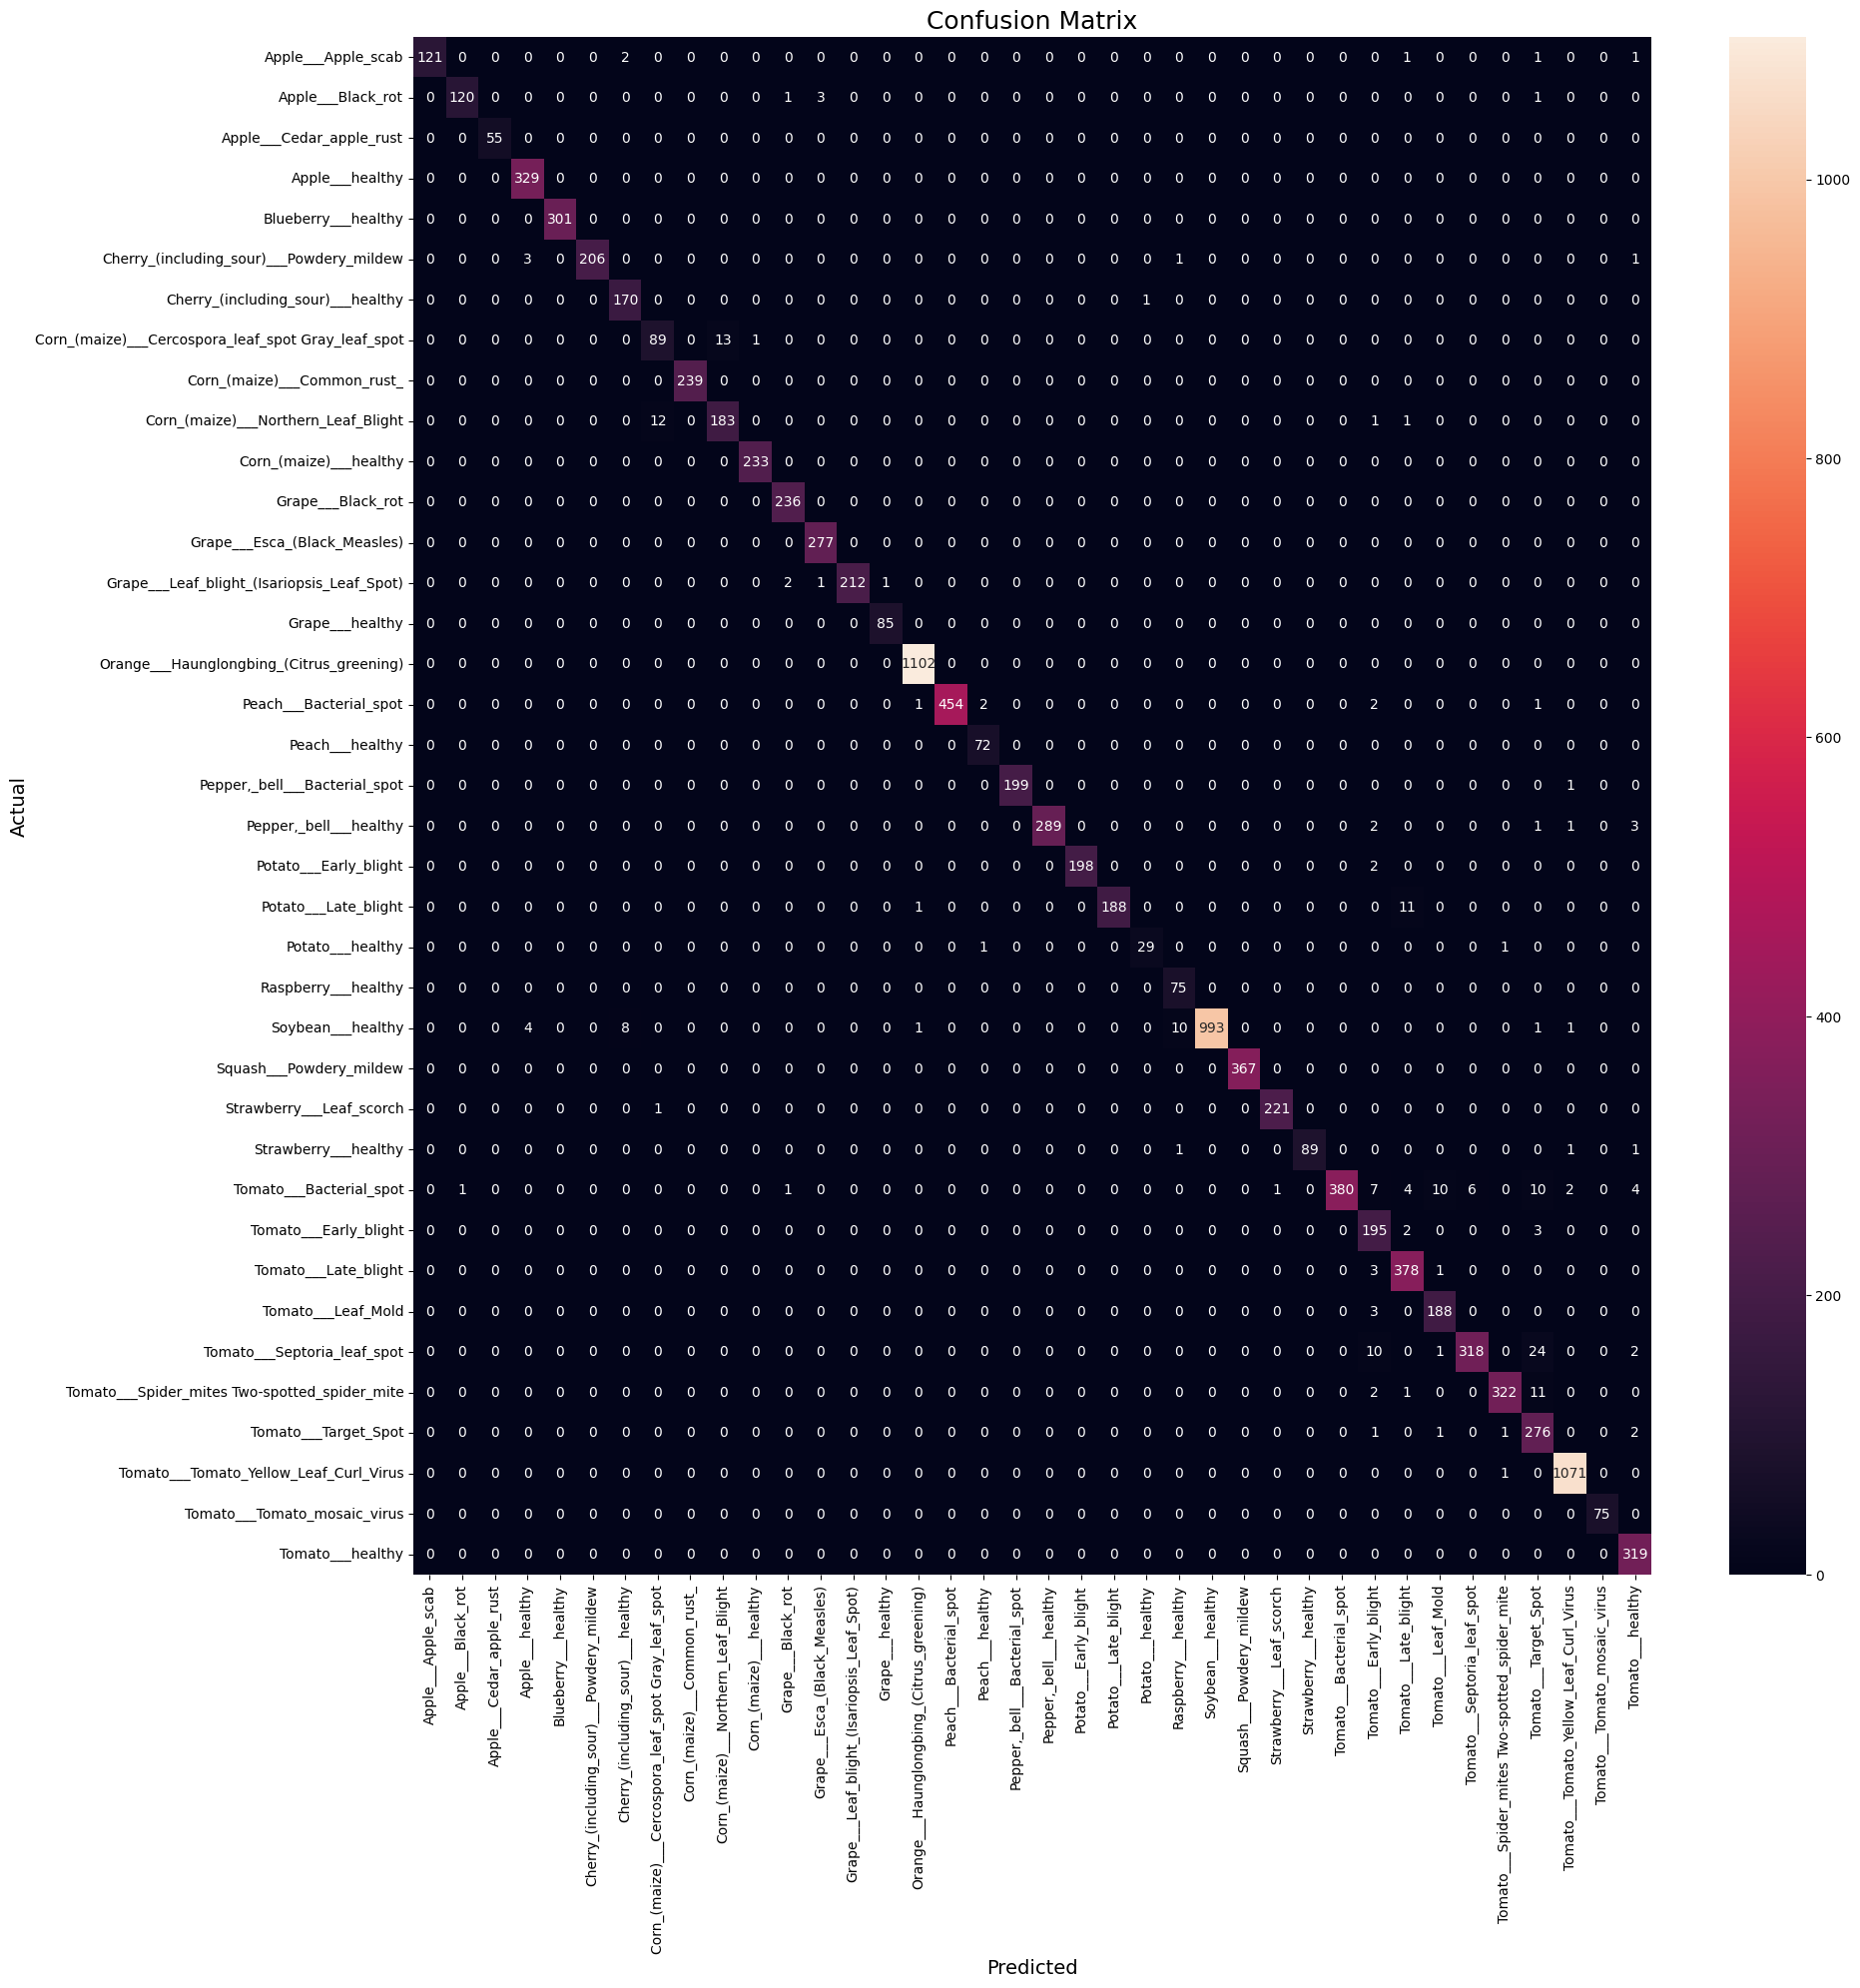

In [19]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1. Get all the predictions from the validation set
y_pred_list = []
y_true_list = []

for images, labels in validation_dataset:
    y_pred_list.append(model.predict(images))
    y_true_list.append(labels.numpy())

# 2. Convert from batches to one big list
y_pred = np.concatenate(y_pred_list, axis=0)
y_true = np.concatenate(y_true_list, axis=0)

# 3. Convert from one-hot encoding (e.g., [0,0,1,0]) to a single number (e.g., 2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# 4. Generate the matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# 5. Plot it (this will be a big plot!)
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()